<a href="https://colab.research.google.com/github/chychur/ds-02/blob/main/Hw2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Домашня робота №2
## Аналіз датасет c Kaggle.com

У цій частині домашньої роботи ми використовуємо дані за Топ-50 рейтингом книг, що найбільше продаються на Amazon за 11 років (з 2009 по 2019). Датасет знаходиться у відкритому доступі на [Kaggle.com](https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019/ "Amazon Top 50 Bestselling Books 2009 - 2019").

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
#presetings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

URL = "/content/drive/MyDrive/Colab Notebooks/bestsellers with categories.csv"


3.1 Прочитайте csv файл (використовуйте функцію read_csv)

In [6]:
df = pd.read_csv(URL)

3.2 Виведіть перші п'ять рядків (використовується функція head)

In [ ]:
df.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


3.3 Виведіть розміри датасету (використовуйте атрибут shape)

In [7]:
df.shape

(550, 7)

In [8]:
book_counts = df['Name'].unique()
len(book_counts)

351

**ВІДПОВІДЬ 3.1** - 351 книга (Про скільки книг зберігає дані датасет?)

In [9]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

3.4 Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції `isna` та `sum`)

In [10]:
missing_data = df.apply(lambda column: column.isnull().sum())
missing_data

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

**ВІДПОВІДЬ 3.2** - Ні (Чи є в якихось змінних пропуски?)

3.5 Перевірте, які є унікальні значення в колонці genre (використовуйте функцію `unique`)

In [11]:
df['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

ВІДПОВІДЬ 3.3 - 2 жанри: 'Non Fiction', 'Fiction' (Які є унікальні жанри?)

3.6 Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте `kind='hist'`)

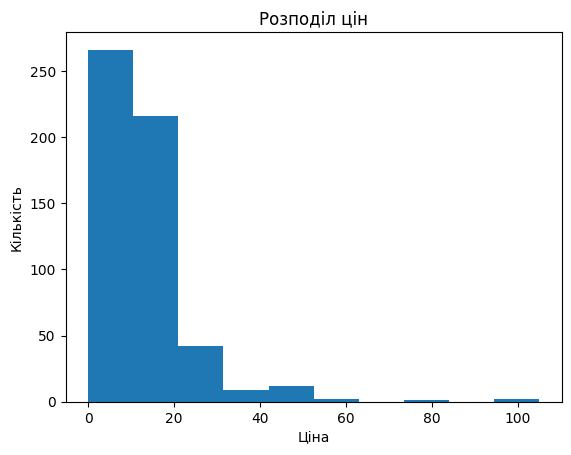

In [46]:
df['price'].plot(kind='hist', legend=False)
plt.title('Pозподіл цін')
plt.xlabel('Ціна')
plt.ylabel('Кількість')
plt.show()

3.7 Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції `max`, `min`, `mean`, `median`)

In [13]:
print("Максимальна ціна:", df['price'].max())
print("Мінімальна ціна:", df['price'].min())
print("Середня ціна:", df['price'].mean())
print("Медіанна ціна:", df['price'].median())

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


**ВІДПОВІДЬ 3.4** - Максимальна ціна: 105

**ВІДПОВІДЬ 3.5** - Мінімальна ціна: 0

**ВІДПОВІДЬ 3.6** - Середня ціна: 13.1

**ВІДПОВІДЬ 3.7** - Медіанна ціна: 11.0

3.8 Найвищий рейтинг в датасеті

In [17]:
max_rating = df['user_rating'].max()
max_rating

4.9

**ВІДПОВІДЬ 3.8** - 4.9 (Який найвищий рейтинг в датасеті?)

3.9 Кількість книг, які мають найвищий рейтинг (4.9)?

In [18]:
count_max_rating_books = df[df['user_rating'] == max_rating].shape[0]
count_max_rating_books

52

**ВІДПОВІДЬ 3.9** - 52 (Скільки книг мають такий рейтинг?)



3.10 Визначити книгу, яка має найбільше відгуків

In [22]:
max_reviews = df[df['reviews'] == df['reviews'].max()]
max_reviews_book = max_reviews['name'].iloc[0]

max_reviews

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


**ВІДПОВІДЬ 3.10** - Книга "Where the Crawdads Sing" із 87841 відгуками (Яка книга має найбільше відгуків?)

3.11 Визначити найдорожчу кнгу?

In [25]:
top_50_2015 = df[(df['year'] == 2015)]
max_price_2015 = top_50_2015[top_50_2015['price'] == top_50_2015['price'].max()]['name'].iloc[0]
max_price_2015

'Publication Manual of the American Psychological Association, 6th Edition'

**ВІДПОВІДЬ 3.11** - Книга "Publication Manual of the American Psychological Association, 6th Edition" із ціною 46 (Яка книга найдорожча?)

3.12 Визначити кількість книг жанру Fiction, які потрапили до Топ-50 у 2010 роц

In [26]:
count_fiction_2010 = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)].shape[0]
count_fiction_2010

20

**ВІДПОВІДЬ 3.12** - 20 книг (Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?)

3.13 визначити скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках

In [27]:
years = [2010, 2011]
count_rating_4_9 = df[(df['user_rating'] == 4.9) & (df['year'].isin(years))].shape[0]
count_rating_4_9

1

**ВІДПОВІДЬ 3.13** - 1 книга (Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?)

3.14 Відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів

In [30]:
filtered_books_2015 = df[(df['year'] == 2015) & (df['price'] < 8)]
sorted_books_2015 = filtered_books_2015.sort_values(by='price')
sorted_books_2015

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


In [31]:
last_book = sorted_books_2015.iloc[-1]['name']
last_book

'Old School (Diary of a Wimpy Kid #10)'

 **ВІДПОВІДЬ 3.13** - Книга "Old School (Diary of a Wimpy Kid #10)" (Яка книга остання у відсортованому списку?)

3.14 Згрупувати книги за жанром і отримаємо максимальні та мінімальні ціни для кожного жанру

In [32]:
genre_price_stats = df.groupby('genre')['price'].agg(['min', 'max'])
genre_price_stats

,min,max
genre,,
Fiction,0,82
Non Fiction,0,105


 **ВІДПОВІДЬ 3.14** - 82 (Максимальна ціна для жанру Fiction?)

 **ВІДПОВІДЬ 3.15** - 0 (Мінімальна ціна для жанру Fiction?)

 **ВІДПОВІДЬ 3.16** - 105 (Максимальна ціна для жанру Non Fiction?)

 **ВІДПОВІДЬ 3.17** - 0 (Мінімальна ціна для жанру Non Fiction?)



3.15 Створемо новий датафрейм, що міщатить кількість книг для кожного з авторів

In [33]:
author_books_count = df.groupby('author').size().reset_index(name='book_count')
author_books_count

,author,book_count
0,Abraham Verghese,2
1,Adam Gasiewski,1
2,Adam Mansbach,1
3,Adir Levy,1
4,Admiral William H. McRaven,1
...,...,...
243,Walter Isaacson,3
244,William Davis,2
245,William P. Young,2
246,Wizards RPG Team,3


In [35]:
author_books_count.shape

(248, 2)

In [37]:
author_most_books = author_books_count.sort_values(by='book_count', ascending=False).iloc[0]
author_most_books

author        Jeff Kinney
book_count             12
Name: 120, dtype: object

 **ВІДПОВІДЬ 3.18** - (248, 2) (Якої розмірності вийшла таблиця?)

 **ВІДПОВІДЬ 3.19** - Автор Jeff Kinney (Який автор має найбільше книг?)

 **ВІДПОВІДЬ 3.20** - 12 книг (Скільки книг цього автора?)

3.16 Створимо другий датафрейм, який буде вміщати середній рейтинг для кожного автора

In [38]:
author_avg_rating = df.groupby('author')['user_rating'].agg(['mean']).reset_index()
author_avg_rating

,author,mean
0,Abraham Verghese,4.600000
1,Adam Gasiewski,4.400000
2,Adam Mansbach,4.800000
3,Adir Levy,4.800000
4,Admiral William H. McRaven,4.700000
...,...,...
243,Walter Isaacson,4.566667
244,William Davis,4.400000
245,William P. Young,4.600000
246,Wizards RPG Team,4.800000


In [39]:
author_min_avg_rating = author_avg_rating.sort_values(by='mean').iloc[0]
author_min_avg_rating

author    Donna Tartt
mean              3.9
Name: 71, dtype: object

 **ВІДПОВІДЬ 3.21** - Автор Donna Tartt (У якого автора середній рейтинг мінімальний?)

**ВІДПОВІДЬ 3.22** - рейтинг 3.9 (Який у цього автора середній рейтинг?)

3.17 З'єднаємо два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг

In [43]:
author_info_combined = pd.concat([author_books_count.set_index('author'), author_avg_rating.set_index('author').round(1)], axis=1)
author_info_combined

,book_count,mean
author,,
Abraham Verghese,2,4.6
Adam Gasiewski,1,4.4
Adam Mansbach,1,4.8
Adir Levy,1,4.8
Admiral William H. McRaven,1,4.7
...,...,...
Walter Isaacson,3,4.6
William Davis,2,4.4
William P. Young,2,4.6


3.18 Відсортуємо датафрейм за зростаючою кількістю книг та зростаючим рейтингом

In [44]:
sorted_author_info = author_info_combined.sort_values(by=['book_count', 'mean'], ascending=True)
sorted_author_info

,book_count,mean
author,,
Muriel Barbery,1,4.0
Chris Cleave,1,4.1
Ian K. Smith M.D.,1,4.1
Pierre Dukan,1,4.1
Elizabeth Strout,1,4.2
...,...,...
American Psychological Association,10,4.5
Gary Chapman,11,4.7
Suzanne Collins,11,4.7


**ВІДПОВІДЬ 3.23** - Автор Muriel Barbery (Який автор перший у списку?)